## Sentiment Analysis(TextBlob)

In [28]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import re
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', None)

In [27]:
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cryco_tweet.csv',  lineterminator='\n')
#Extend column width to see entire text & load dataset
#pd.set_option('max_colwidth', None)
data_raw = pd.read_csv('Dec28toJan03_Clean.csv')
data_raw.head()

,Date,ID,lang,Tweet,Original Tweet
0,2021-01-03T19:20:59.000Z,1345812421676576768,en,mkbhd step 2 buy eth sub 1k step 3 outperform btcagain,@MKBHD Step 2: buy $ETH sub $1k\n\nStep 3: outperform $BTC...again.
1,2021-01-03T19:20:59.000Z,1345812421600940032,en,rt naturalmed777 think xrp xlm bigger people realize many stablecoins quietly built stellarxlm,RT @Naturalmed777: I think $XRP $XLM are bigger than what most people realize.\n\nHow many stablecoins were quietly built on Stellar/XLM in t…
2,2021-01-03T19:20:59.000Z,1345812421584285698,en,rt sheresed69 new toy subscribe onlyfans see squirt link bio httpstcox6ga8zbroo,RT @Sheresed69: New toy 😍😍 subscribe to my onlyfans to see me squirt 🥰\nLink in bio 🤑 https://t.co/x6Ga8ZBrOO
3,2021-01-03T19:20:59.000Z,1345812420955144197,en,rt tokengoodguy0 digibyte dgb likely move faster bitcoin btc people realize undervalued secure faster,"RT @TokenGoodGuy0: .\n#Digibyte $dgb likely to move faster than #Bitcoin $btc when people realize it is undervalued, secure and faster\n\nIf D…"
4,2021-01-03T19:20:59.000Z,1345812420783206401,en,rt nixtetic use comp remote commission work halt crash often know stop working woul,"RT @nixtetic: I use my comp. for remote and commission work, but it halts and crashes so often that I know it will stop working, and I woul…"


In [ ]:
#Pass original data to new variable to store if we ned to reload the dataset
data = data_raw

In [29]:
# Function to get the subjectivity (tells how subjective the text maybe)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [30]:
# Create two new columns
data['Subjectivity'] = data ['Tweet'].apply(getSubjectivity)
data['Polarity'] = data ['Tweet'].apply(getPolarity)

In [31]:
#Preview Cells
data.head()

,Date,ID,lang,Tweet,Original Tweet,Subjectivity,Polarity
0,2021-01-03T19:20:59.000Z,1345812421676576768,en,mkbhd step 2 buy eth sub 1k step 3 outperform btcagain,@MKBHD Step 2: buy $ETH sub $1k\n\nStep 3: outperform $BTC...again.,0.000000,0.000000
1,2021-01-03T19:20:59.000Z,1345812421600940032,en,rt naturalmed777 think xrp xlm bigger people realize many stablecoins quietly built stellarxlm,RT @Naturalmed777: I think $XRP $XLM are bigger than what most people realize.\n\nHow many stablecoins were quietly built on Stellar/XLM in t…,0.444444,0.166667
2,2021-01-03T19:20:59.000Z,1345812421584285698,en,rt sheresed69 new toy subscribe onlyfans see squirt link bio httpstcox6ga8zbroo,RT @Sheresed69: New toy 😍😍 subscribe to my onlyfans to see me squirt 🥰\nLink in bio 🤑 https://t.co/x6Ga8ZBrOO,0.454545,0.136364
3,2021-01-03T19:20:59.000Z,1345812420955144197,en,rt tokengoodguy0 digibyte dgb likely move faster bitcoin btc people realize undervalued secure faster,"RT @TokenGoodGuy0: .\n#Digibyte $dgb likely to move faster than #Bitcoin $btc when people realize it is undervalued, secure and faster\n\nIf D…",0.800000,0.200000
4,2021-01-03T19:20:59.000Z,1345812420783206401,en,rt nixtetic use comp remote commission work halt crash often know stop working woul,"RT @nixtetic: I use my comp. for remote and commission work, but it halts and crashes so often that I know it will stop working, and I woul…",0.200000,-0.100000


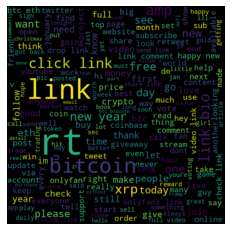

In [33]:
# Plot Word Cloud (shows the most commonly used words)
allWords = ' '.join([twts for twts in data['Tweet']])
wordCloud = WordCloud(width = 700, height = 700, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [34]:
# Function to comute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

data['Analysis'] = data['Polarity'].apply(getAnalysis)

In [35]:
#Preview dataframe
data.head()

,Date,ID,lang,Tweet,Original Tweet,Subjectivity,Polarity,Analysis
0,2021-01-03T19:20:59.000Z,1345812421676576768,en,mkbhd step 2 buy eth sub 1k step 3 outperform btcagain,@MKBHD Step 2: buy $ETH sub $1k\n\nStep 3: outperform $BTC...again.,0.000000,0.000000,Neutral
1,2021-01-03T19:20:59.000Z,1345812421600940032,en,rt naturalmed777 think xrp xlm bigger people realize many stablecoins quietly built stellarxlm,RT @Naturalmed777: I think $XRP $XLM are bigger than what most people realize.\n\nHow many stablecoins were quietly built on Stellar/XLM in t…,0.444444,0.166667,Positive
2,2021-01-03T19:20:59.000Z,1345812421584285698,en,rt sheresed69 new toy subscribe onlyfans see squirt link bio httpstcox6ga8zbroo,RT @Sheresed69: New toy 😍😍 subscribe to my onlyfans to see me squirt 🥰\nLink in bio 🤑 https://t.co/x6Ga8ZBrOO,0.454545,0.136364,Positive
3,2021-01-03T19:20:59.000Z,1345812420955144197,en,rt tokengoodguy0 digibyte dgb likely move faster bitcoin btc people realize undervalued secure faster,"RT @TokenGoodGuy0: .\n#Digibyte $dgb likely to move faster than #Bitcoin $btc when people realize it is undervalued, secure and faster\n\nIf D…",0.800000,0.200000,Positive
4,2021-01-03T19:20:59.000Z,1345812420783206401,en,rt nixtetic use comp remote commission work halt crash often know stop working woul,"RT @nixtetic: I use my comp. for remote and commission work, but it halts and crashes so often that I know it will stop working, and I woul…",0.200000,-0.100000,Negative


Positive    4064
Neutral     3910
Negative    1129
Name: Analysis, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


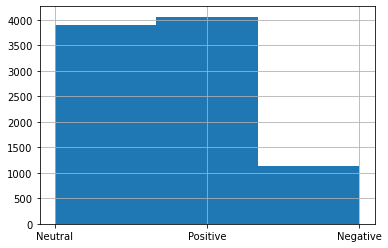

In [36]:
#View value counts for sentiment results
print(data['Analysis'].value_counts())
#View distribution freq of sentiment results
print(data['Analysis'].hist(bins=3))

In [39]:
#Save cleaned dataframe to csv for analysis
data.to_csv('Dec28toJan03(textBlob).csv', index = False)

### End of Sentiment Analysis

In [37]:
# Show all of the positive tweets (sort with most positive first)
#j = 1
#sortedData = data.sort_values(by=['Polarity'])
#for i in range(0, sortedData.shape[0]):
    #if (sortedData['Analysis'][i] == 'Positive'):
        #print(str(j) + ') '+sortedData['text'][i])
        #print()
       # j = j+1

In [38]:
# Show negative tweets
#j = 1
#sortedData = data.sort_values(by=['Polarity'], ascending='False')
#for i in range(0, sortedData.shape[0]):
    #if (sortedData['Analysis'][i] == 'Negative'):
        #print(sortedData['text'][i])
        #print()
        #j = j+1